# Training Model

## Linear Regression

### The Normal equation

<span style="font-size: 1.2rem">$\hat{\theta} = (X^{T} . X)^{-1} . X^{T} . y = X^{+} . y$</span>
* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* y is vector of target values.
* $X^{+}$ is pseudoinverse of X

In [11]:
import numpy as np

np.random.seed(42)
num_instances = 100
X = 2 * np.random.rand(num_instances, 1)
y = 3*X + 4 + np.random.randn(num_instances, 1)

In [13]:
X[:2], y[:2]

(array([[0.74908024],
        [1.90142861]]),
 array([[6.33428778],
        [9.40527849]]))

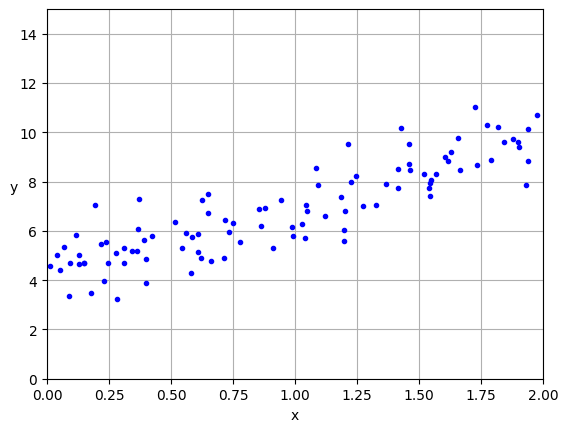

In [21]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

In [23]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

In [26]:
X[:2], X_b[:2]

(array([[0.74908024],
        [1.90142861]]),
 array([[1.        , 0.74908024],
        [1.        , 1.90142861]]))

In [29]:
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
best_theta

array([[4.21509616],
       [2.77011339]])

**NOTE**: pseudoinverse

In [54]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [32]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [33]:
y_new_pred = X_new_b @ best_theta
y_new_pred

array([[4.21509616],
       [9.75532293]])

In [35]:
y_pred = X_b @ best_theta
y_pred[:2]

array([[6.29013335],
       [9.48226901]])

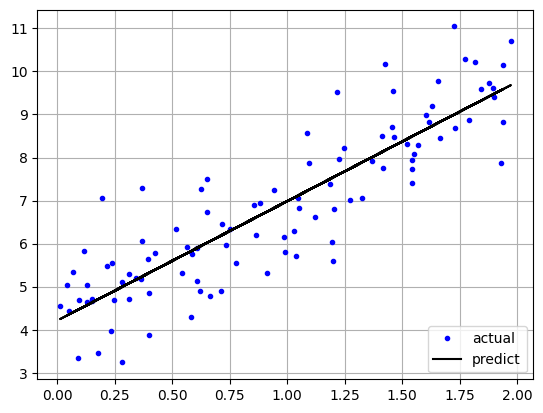

In [47]:
plt.plot(X, y, 'b.', label='actual')
plt.plot(X, y_pred, 'k-', label='predict')

plt.legend(loc='lower right')
plt.grid()
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [51]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [52]:
best_theta

array([[4.21509616],
       [2.77011339]])

In [53]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

### Computational Complexity

* Both the Normal equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). On the
positive side, both are linear with regard to the number of instances
in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory
* Also, once you have trained your linear regression model (using the Normal equation
or any other algorithm), predictions are very fast: the computational complexity is
linear with regard to both the number of instances you want to make predictions on
and the number of features. In other words, making predictions on twice as many
instances (or twice as many features) will take roughly twice as much time.
* Now we will look at a very different way to train a linear regression model, which is
better suited for cases where there are a large number of features or too many training
instances to fit in memory

## Gradient Descent

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*XntrQhkSlmxC6QejBjEbww.png' style='width: 50%'/>